# Fuzzy - exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *boa* então a gorjeta será *alta*


## Instalação e importação das bibliotecas

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=5e18a09f90b2811d890bf16f32fb0cf359d41f927e6f8519b11c3eccb383df15
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [ ]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [ ]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

## Membership functions

In [ ]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

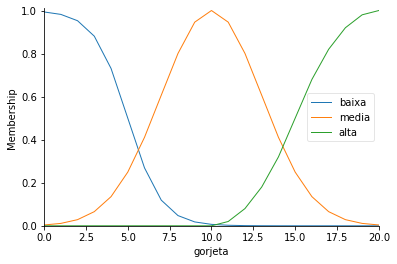

In [ ]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)
gorjeta.view()

In [ ]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

5.662380878042331


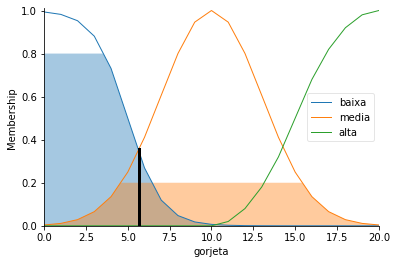

In [ ]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)